# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [2]:
a = torch.rand((3, 4), dtype=torch.float64)
b = torch.rand((12,), dtype=torch.float64)

a, b

(tensor([[0.3444, 0.1867, 0.8294, 0.3474],
         [0.6556, 0.6352, 0.5498, 0.5826],
         [0.0528, 0.1973, 0.3807, 0.2695]], dtype=torch.float64),
 tensor([0.1535, 0.9860, 0.2600, 0.0333, 0.4019, 0.6408, 0.2740, 0.0537, 0.3452,
         0.2535, 0.8354, 0.9333], dtype=torch.float64))

In [3]:
c = b.reshape(2, 2, 3)

c

tensor([[[0.1535, 0.9860, 0.2600],
         [0.0333, 0.4019, 0.6408]],

        [[0.2740, 0.0537, 0.3452],
         [0.2535, 0.8354, 0.9333]]], dtype=torch.float64)

In [4]:
a[:, 0]

tensor([0.3444, 0.6556, 0.0528], dtype=torch.float64)

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [5]:
a = torch.rand((5, 2), dtype=torch.float64)
b = torch.rand((1, 10), dtype=torch.float64)

a, b

(tensor([[0.2108, 0.3462],
         [0.4802, 0.7703],
         [0.2830, 0.9881],
         [0.3021, 0.3315],
         [0.3840, 0.0253]], dtype=torch.float64),
 tensor([[0.5966, 0.6304, 0.8186, 0.7431, 0.6530, 0.2132, 0.7933, 0.0117, 0.6708,
          0.7435]], dtype=torch.float64))

In [6]:
c = b.reshape((5, 2))

In [7]:
a + c

tensor([[0.8074, 0.9766],
        [1.2988, 1.5133],
        [0.9360, 1.2013],
        [1.0954, 0.3432],
        [1.0548, 0.7687]], dtype=torch.float64)

In [8]:
a - c

tensor([[-0.3858, -0.2842],
        [-0.3383,  0.0272],
        [-0.3700,  0.7748],
        [-0.4912,  0.3198],
        [-0.2867, -0.7182]], dtype=torch.float64)

In [9]:
a * c

tensor([[0.1258, 0.2182],
        [0.3931, 0.5724],
        [0.1848, 0.2107],
        [0.2396, 0.0039],
        [0.2576, 0.0188]], dtype=torch.float64)

In [10]:
a @ c.T

tensor([[0.3440, 0.4298, 0.2115, 0.1713, 0.3988],
        [0.7721, 0.9655, 0.4779, 0.3900, 0.8948],
        [0.7917, 0.9658, 0.3955, 0.2361, 0.9244],
        [0.3892, 0.4936, 0.2679, 0.2435, 0.4491],
        [0.2451, 0.3331, 0.2562, 0.3050, 0.2764]], dtype=torch.float64)

In [11]:
a / c

tensor([[ 0.3533,  0.5492],
        [ 0.5867,  1.0366],
        [ 0.4334,  4.6333],
        [ 0.3808, 28.3044],
        [ 0.5725,  0.0340]], dtype=torch.float64)

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [12]:
images = torch.zeros((100, 200, 200, 3), dtype=torch.int)

In [13]:
def draw_line(img, line):
    img[2*line:2*line+2] = 255
    return img

In [14]:
max_val = int(2 ** 8 - 1)
for i in range(images.shape[0]):
    images[i, 2*i:2*i+2] = max_val

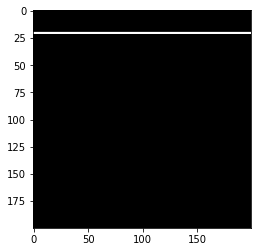

In [15]:
plt.imshow(images[10])

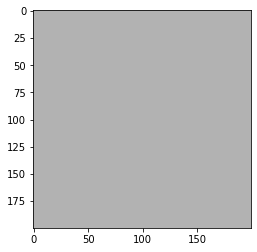

In [16]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [17]:
if not torch.cuda.is_available():
    raise RuntimeError('Cuda is not available')
else:
    !nvidia-smi
    device = 'cuda:0'

Sat Dec  3 13:35:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   51C    P0    35W /  N/A |   1862MiB / 16384MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
a = torch.rand((2, 3, 4), device=device)
b = torch.rand((1, 8, 3), device=device)
a, b

(tensor([[[0.2358, 0.6664, 0.4162, 0.9269],
          [0.4712, 0.1060, 0.6235, 0.7950],
          [0.8905, 0.9289, 0.0250, 0.2439]],
 
         [[0.6541, 0.6985, 0.0080, 0.2567],
          [0.5082, 0.3684, 0.8729, 0.2241],
          [0.0281, 0.5484, 0.7721, 0.7114]]], device='cuda:0'),
 tensor([[[0.7529, 0.8509, 0.4057],
          [0.3853, 0.2030, 0.3183],
          [0.4102, 0.4611, 0.3773],
          [0.6180, 0.4620, 0.5175],
          [0.5234, 0.6932, 0.1501],
          [0.2481, 0.6734, 0.7836],
          [0.7492, 0.3851, 0.4094],
          [0.0715, 0.0657, 0.1488]]], device='cuda:0'))

In [19]:
c = b.reshape(a.shape)

a.shape, c.shape

(torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

In [20]:
a = a.cpu()
c = c.cpu()

a.device, c.device

(device(type='cpu'), device(type='cpu'))

In [21]:
a = Variable(a)
c = Variable(c, requires_grad=True)

a, c

(tensor([[[0.2358, 0.6664, 0.4162, 0.9269],
          [0.4712, 0.1060, 0.6235, 0.7950],
          [0.8905, 0.9289, 0.0250, 0.2439]],
 
         [[0.6541, 0.6985, 0.0080, 0.2567],
          [0.5082, 0.3684, 0.8729, 0.2241],
          [0.0281, 0.5484, 0.7721, 0.7114]]]),
 tensor([[[0.7529, 0.8509, 0.4057, 0.3853],
          [0.2030, 0.3183, 0.4102, 0.4611],
          [0.3773, 0.6180, 0.4620, 0.5175]],
 
         [[0.5234, 0.6932, 0.1501, 0.2481],
          [0.6734, 0.7836, 0.7492, 0.3851],
          [0.4094, 0.0715, 0.0657, 0.1488]]], requires_grad=True))

In [22]:
L = torch.mean((c - a)**2)
L.backward()

In [23]:
c.grad

tensor([[[ 0.0431,  0.0154, -0.0009, -0.0451],
         [-0.0223,  0.0177, -0.0178, -0.0278],
         [-0.0428, -0.0259,  0.0364,  0.0228]],

        [[-0.0109, -0.0004,  0.0118, -0.0007],
         [ 0.0138,  0.0346, -0.0103,  0.0134],
         [ 0.0318, -0.0397, -0.0589, -0.0469]]])